---
# **Project** : **Pose Landmarks Detection on image and video**
---
### ---> **Sahil Kumar 777**

This project performs pose landmarks detection in real time using mediapipe framework. The output can be can be used in various applications like to identify key body locations, analyze posture, and categorize movements.

* **Objective :-** Detect pose landmarks
* **Modules :-** openCV, Mediapipe


## Install Important Libraries

In [1]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have prot

## Functions to visualize results

### pose Landmark Visualization function for images

In [1]:
import numpy as np
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected no of poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

### Generete and Save Video from ImageList

In [2]:
# Convert To Video

import cv2
import mediapipe as mp

def visualize_video(filename,images) :
  """ Function to generate video from list of images.
      Args:
          filename
          images
      Return :
          It returns filename """

  imagesList = [image for image in images]

  # Define the codec and create a VideoWriter object
  fourcc = cv2.VideoWriter_fourcc(*'VP80')  # Can use other codecs like 'mp4v' (for .mp4 files) but mp4 converted files are not supported by coalb and browsers
  fps = 30  # Frames per second
  height, width, _ = imagesList[0].shape

  # Open VideoWriter
  video_writer =  cv2.VideoWriter(filename, fourcc, fps, (width, height))

  # Display gestures and hand landmarks.
  for image in imagesList:
    annotated_image = image.copy()
    video_writer.write(annotated_image)
  video_writer.release() # Closes VideoWriter
  return filename

### Function to Play Video In Colab

In [3]:
from IPython.display import HTML
from base64 import b64encode

def play_video_in_colab(filepath) :

  with open(filepath,'rb') as file :
    mp4 = file.read()
    data_url = "data:video/"+ filepath.split('.')[-1] +";base64,"  + b64encode(mp4).decode()

  return HTML("""
    <video src="%s" type="video/webm" width="640" height="480" controls autoplay>
    </video>
  """  % data_url)

## Image pose landmarks detection


In [4]:
# Load the pre trained model
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [5]:
import cv2
import mediapipe as mp

# Initializing the recogniser options
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

model_path = 'pose_landmarker.task'
options = PoseLandmarkerOptions(base_options=BaseOptions(model_asset_path=model_path),running_mode=VisionRunningMode.IMAGE)

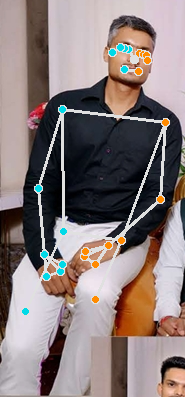

In [6]:
### Pose Landmarks Detection
from google.colab.patches import cv2_imshow

# STEP 1: Initialize the detector
with PoseLandmarker.create_from_options(options) as detector:

  image = mp.Image.create_from_file("Sahil_pose.jpeg") # Returns SRGBA format image

  mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image.numpy_view())

  # STEP 4: Recognize gestures in the input image.
  detection_result = detector.detect(image)

  # STEP 5: Process the result. In this case, visualize it.
  n = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGBA2BGR)
  annotated_image = draw_landmarks_on_image(n, detection_result)
  # cv2_imshow(annotated_image)
  cv2_imshow(annotated_image)

In [7]:
detection_result

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.7271009087562561, y=0.15094459056854248, z=-0.9061760306358337, visibility=0.9998743534088135, presence=0.9997814297676086), NormalizedLandmark(x=0.7541579604148865, y=0.1337873339653015, z=-0.81199711561203, visibility=0.9994893074035645, presence=0.9989826083183289), NormalizedLandmark(x=0.7742123007774353, y=0.1373530626296997, z=-0.8129613399505615, visibility=0.9994187355041504, presence=0.9989926218986511), NormalizedLandmark(x=0.7921054363250732, y=0.14022085070610046, z=-0.8131718635559082, visibility=0.9995090961456299, presence=0.9986326098442078), NormalizedLandmark(x=0.6951894164085388, y=0.12366974353790283, z=-0.8348045349121094, visibility=0.9997572302818298, presence=0.9988946318626404), NormalizedLandmark(x=0.6747527122497559, y=0.12157988548278809, z=-0.8360230326652527, visibility=0.999815046787262, presence=0.9991028308868408), NormalizedLandmark(x=0.6521186828613281, y=0.12055313587188721, z=-0.8368375897

## Video pose detection


In [ ]:
# Load the pre trained model
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [12]:
import cv2
import mediapipe as mp

# Initializing the recogniser options
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

model_path = 'pose_landmarker.task'
options = PoseLandmarkerOptions(base_options=BaseOptions(model_asset_path=model_path),running_mode=VisionRunningMode.VIDEO)

In [13]:
### Pose Landmarks Detection

# STEP 1: Initialize the detector
with PoseLandmarker.create_from_options(options) as detector:

  # STEP 2: Intialize the video capturing into frames
  cap = cv2.VideoCapture('Running.mov')
  fps = cap.get(cv2.CAP_PROP_FPS)
  images=[]
  results=[]
  i=0

  while cap.isOpened():

    # STEP 3: Read the frames one by one
    success,frame = cap.read();

    if not success :
      if i==0:
        print('Empty frame')
      else :
        print('Detection Completed')
        print('Total Frames : ',i)
      break
    if i == 301 :
      break
    frame_timestamp_ms = int(cap.get(cv2.CAP_PROP_POS_MSEC)) # Get timestamp of the frame
    # frame = cv2.flip(frame, 1) # flip the frame

    # Convert the frame received from OpenCV to a MediaPipe’s Image object.
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

    # STEP 4: Recognize gestures in the input image.
    detection_result = detector.detect_for_video(mp_image,frame_timestamp_ms)

    # STEP 5: Process the result. In this case, visualize it.
    # n = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGBA2BGR)
    annotated_image = draw_landmarks_on_image(frame, detection_result)

    images.append(annotated_image)
    print(i)
    i+=1

  cap.release()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
visualize_video('OutputVideo1.webm',images)

'OutputVideo1.webm'

In [ ]:
play_video_in_colab('OutputVideo1.webm')